# Colored Noise

In this notebook we are going to discuss various colored noise, such as white noise, in the time and frequency domain and how they relate to brain oscillations.

In [4]:
import numpy as np
from numpy.fft import irfft
import pandas as pd
from scipy.signal import normalize
import matplotlib.pyplot as plt

General noise is a signal that is largely formed through a [stochasitc process](https://en.wikipedia.org/wiki/Stochastic). When we talk about colored noise we usually refer to an additional underlying pattern that is evident in the signal eventhough there is some amount of randomness involved.

Some types of colored noise follow the general form of $$\frac{1}{f^{\beta}}$$ where β determines the 'color' and property of the noise. These are the types of noise we will be discussing in this notebook

### White Noise - Time Domain

White noise is an example of a power law noise where β = 0. Below is a time series of white noise. This noise is generated by sampling from a normal distribution and as a result we see the y values mirror the normal distribution - there are many samples close to 0 and fewer samples further away from 0. White noise can also be generated from other distributions such as unifom and poisson distributions which affect the range of the samples.

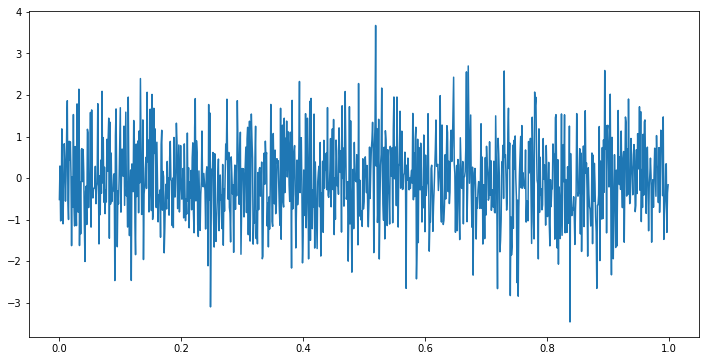

In [5]:
#Generate white noise time series 
mean = 0
std = 1 

# length of time series
num_samples = 1000000 

# sampling rate 1000Hz
fs = 1000 

# generate white (random) noise
white_noise_data = np.random.normal(mean, std, size=num_samples) 

# time scale = number of samples / sampling rate
t = np.arange(len(white_noise_data))/fs 

#p lot 1 second of white noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], white_noise_data[0:1000]) #plot samples over time

### White noise - Frequency Domain

If we compute a fourier transfrom on our white noise time series signal we will arrive at the frequency domain of our signal. The main characteristic of white noise is that the frequency spectrum is flat - this is where the Power law relationship of 1/f^0 comes from. The total power in any two frequency bands of equal width is the same. For example, the total power from [20, 50] Hz is the same as the total power in [350, 380] Hz because the bandwidths are both the same. For those interested, here's [why](https://en.wikipedia.org/wiki/Law_of_large_numbers)

C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of White Noise')

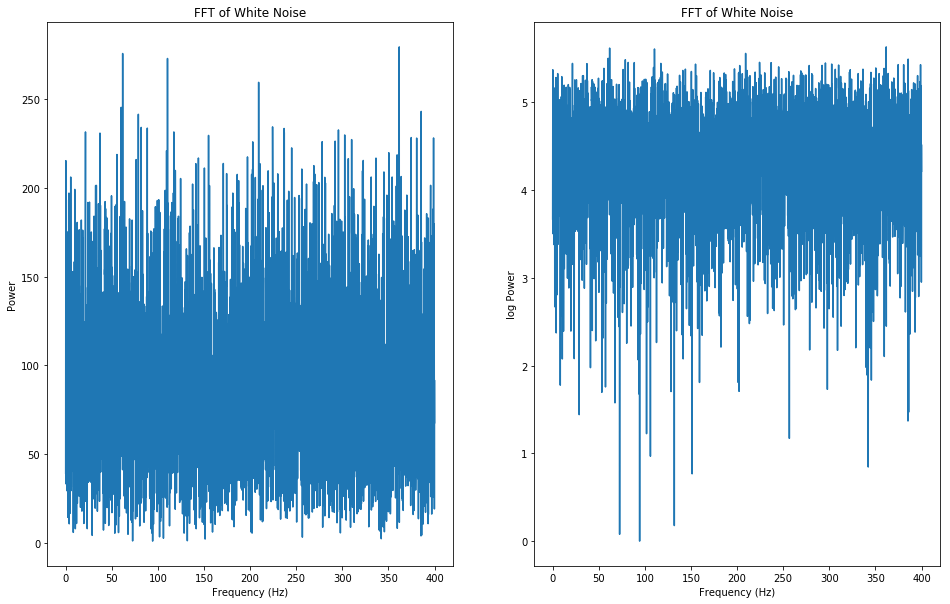

In [6]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(white_noise_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(white_noise_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:4000],abs(fourier[0:4000])) #any frequencies above 200 Hz are probably noise
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of White Noise')

# Same thing but in log space
plt.subplot(1,2,2)
plt.plot(fx_bins[0:4000],np.log(abs(fourier[0:4000]))) #any frequencies above 200 Hz are probably noise
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of White Noise')

### Pink noise - Time Domain

Pink noise is our next power law noise which has a β value of β = 1. The time series seems more sporadic than the white noise time series but the pink noise PSD has some interesting features. This is the first noise whose power spectrum resembles a signal found in the brain. The following is an algorithm created by Voss and McCarthy to generate pink noise. 

Voss, R. F., & Clarke, J. (1978). "1/f noise" in music: Music from 1/f noise". Journal of the Acoustical Society of America 63: 258–263.

In [7]:
#Function to generate time series with properties of pink noise
def voss(nrows, ncols=16):
    """Generates pink noise using the Voss-McCartney algorithm.
    
    nrows: number of values to generate
    rcols: number of random sources to add
    
    returns: NumPy array
    """
    array = np.empty((nrows, ncols))
    array.fill(np.nan)
    array[0, :] = np.random.random(ncols)
    array[:, 0] = np.random.random(nrows)
    
    # the total number of changes is nrows
    n = nrows
    cols = np.random.geometric(0.5, n)
    cols[cols >= ncols] = 0
    rows = np.random.randint(nrows, size=n)
    array[rows, cols] = np.random.random(n)

    df = pd.DataFrame(array)
    df.fillna(method='ffill', axis=0, inplace=True)
    total = df.sum(axis=1)

    return total.values

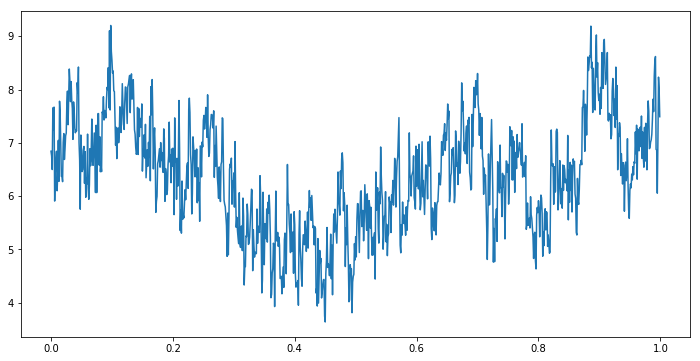

In [8]:
pink_data = voss(1000000)
fs = 1000
t = np.arange(len(pink_data))/fs

#plot 1 second of pink noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], pink_data[0:1000]) #plot samples over time

### Pink noise - Frequency Domain

C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of Pink Noise')

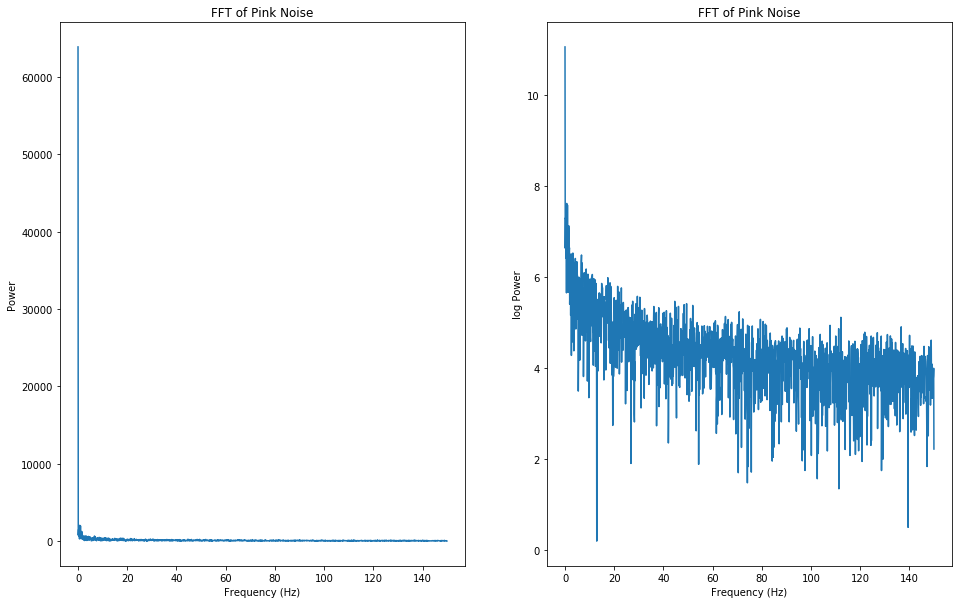

In [9]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(pink_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(pink_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:1500],abs(fourier[0:1500])) 
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Pink Noise')

#same thing but in log space
plt.subplot(1,2,2)
plt.plot(fx_bins[0:1500],np.log(abs(fourier[0:1500]))) 
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Pink Noise')

Notice that in linear space plot (up on left) plots the data in a hard-to-digest way. As a result, pink noise is often shown in log space - the y-axis is scaled such that each subsequent value is 10x larger than the previous. It turns out that this distribution $\frac{1}{f^{1}}$ mysteriously shows up quite a lot in the [universe](https://www.youtube.com/watch?v=fCn8zs912OE)

### Brown noise - Time domain

The last colored noise we will go over is Brown noise which has β = 2. Brown noise, also known as red noise, looks similar to pink noise in both the time domain and frequency domain but with some exaggerated features - the time series is even more sporadic.

In [10]:
#Function to generate time series with properties of brown noise
def brown(N, state=None):
    
    state = np.random.RandomState() if state is None else state
    uneven = N%2
    X = state.randn(N//2+1+uneven) + 1j * state.randn(N//2+1+uneven)
    S = (np.arange(len(X))+1)# Filter
    y = (irfft(X/S)).real
    if uneven:
        y = y[:-1]
    return normalize(y,1)

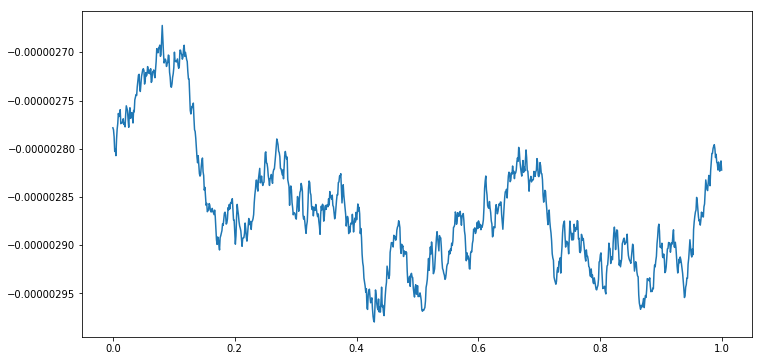

In [18]:
# get brown noise data as time series
normalized_arrays = brown(1000000)
brown_data= normalized_arrays[0]
fs = 1000
t = np.arange(len(brown_data))/fs

#plot 1 second of brown noise data
plt.figure(figsize=[12,6])
plt.plot(t[0:1000], brown_data[0:1000]) #plot samples over time

C:\Users\julio\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Text(0.5,1,'FFT of Brown Noise')

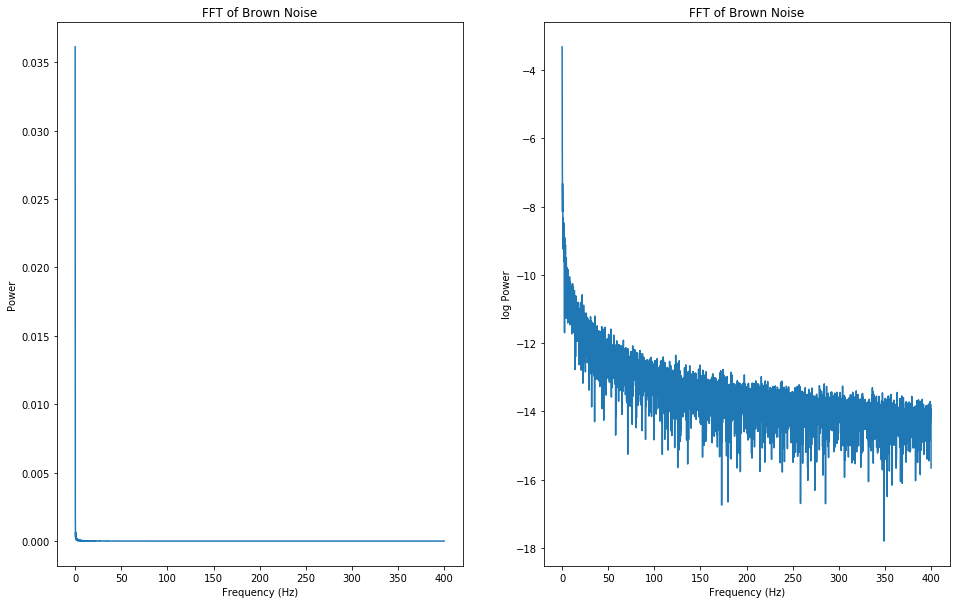

In [19]:
# calculating fourier transform of complex signal
# we're going to take a sample of the data to keep fx bins at a reasonable size.
fourier = np.fft.fft(brown_data[0:10000]) 

# finding frequency values for the x axis
fx_step_size = fs/len(brown_data[0:10000])
nyq = .5*fs
total_steps = nyq/fx_step_size
fx_bins = np.linspace(0,nyq,total_steps)

plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
plt.plot(fx_bins[0:4000],abs(fourier[0:4000])) #any frequencies above 200 Hz are probably noise
plt.ylabel('Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Brown Noise')

plt.subplot(1,2,2)
plt.plot(fx_bins[0:4000],np.log(abs(fourier[0:4000]))) #any frequencies above 200 Hz are probably noise
plt.ylabel('log Power')
plt.xlabel('Frequency (Hz)')
plt.title('FFT of Brown Noise')

Notice that in linear space the power spectrum is slightly harder to digest than the pink noise counterpart. Also note that the slope of the power spectrum is slightly steeper than that of pink noise. These patterns will be more exaggerated as β takes on larger values.